# Os impactos do suicídio na pandemia

**Grupo**:
- Ana Beatriz Oliveira de Macedo
- Andson Andre da Silva Ribeiro 
- Bruna Bellini Faria
- Lucca Cerf Costa
- Thiago Rodrigues de Jesus Carvalho

**Matéria**:

Projeto integrado:  Storytelling

## Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import folium
import plotly.express as px
import datetime
import re
import json

## Análise de palavras postadas no Twitter

Nesta análise se encontram três WordClouds, ou seja, três nuvens de palavras que englobam palavras encontradas em diversos tweets publicados por usuários e coletados em um site chamado "Workbench", este site coleta até 3000 postagens do conteúdo buscado e gera um csv com os mesmos. 

O primeiro WordCloud foi resultado de uma pesquisa das frases “não aguento mais” e “não posso mais viver” por todo o Twitter em português, já o segundo foi resultado da busca pela palavra  “suicídio” nas postagens e o terceiro foi por meio da busca das palavras “suicida” e “suicidar”. Com isso, notamos por meio da visualização das imagens que todos possuem palavras fortes que são compartilhadas diariamente nesta rede social, o essêncial para nós foi observar o quanto é importante para diversas pessoas conversar ou expor sua situação de uma maneira anônima ou não, as palavras mostram uma mistura de últimas despedidas, pedidos de ajuda, relatos de experiências e ofertas de apoio. Ademais, tudo isto mostra a essência por trás do Twitter, dentro da análise existe um pequeno padrão de ajuda e suporte nos posts fornecido pelos usuários (para o bem), mas também um padrão de experiências, motivos e desentendimentos (para o mal), que mostram como as pessoas precisam de um espaço para se expressar. Por fim, essa avaliação de necessidade de espaço de fala pelas pessoas gerou em nós uma motivação maior para continuar o trabalho.

### Importando os dados

In [31]:
# WordCloud 1
# NAM= frase de pesquisa "Não Aguento Mais"

twitter_NAM =pd.read_csv(r'./Data/twitter_1.csv', sep=',')

twitter_NAM= twitter_NAM.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_NAM.columns.values[0]= 'Usuário'
twitter_NAM.columns.values[1]= 'Data de postagem'
twitter_NAM.columns.values[2]= 'Texto'

#twitter_NAM.info()
twitter_NAM.head(8)

,Usuário,Data de postagem,Texto
0,cherrywrxs,2021-05-10T19:07:55Z,RT @aslion: tou tão desinteressada últimamente...
1,pipoca_sep,2021-05-10T18:43:03Z,"Cortei a franja da Anna, ela se mexeu, ficou t..."
2,MathKavalcante,2021-05-10T18:20:18Z,RT @aslion: tou tão desinteressada últimamente...
3,Madame_Cosett,2021-05-10T18:11:56Z,RT @aslion: tou tão desinteressada últimamente...
4,Visatotn,2021-05-10T18:04:15Z,eu. não. consigo. mais. viver. nesse. país. te...
5,H3LBERTGE0RGE,2021-05-10T17:29:04Z,que ódiokk\n\n@DynaRiotS2 @Mushro0mBoy bora en...
6,Lailapadua4,2021-05-10T17:20:31Z,@alarissamatos Já não consigo nem viver direit...
7,mary_sozzo,2021-05-10T17:12:28Z,Minha mente é um turbilhão mais eu consigo viv...


In [32]:
# WordCloud 2
# SC= palavra de pesquisa "Suicídio"

twitter_SC =pd.read_csv(r'./Data/twitter_3.csv', sep=',')

twitter_SC= twitter_SC.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SC.columns.values[0]= 'Usuário'
twitter_SC.columns.values[1]= 'Data de postagem'
twitter_SC.columns.values[2]= 'Texto'

#twitter_SC.info()
twitter_SC.head(8)

,Usuário,Data de postagem,Texto
0,yleunameem,2021-05-10T22:33:13Z,coragem pra cometer suicídio só queria isso
1,__bieela,2021-05-10T22:33:08Z,Já te falei vida do crime é suicidio lento
2,marieamts,2021-05-10T22:33:03Z,RT @nacarulyna: nao ironicamente suicídio es...
3,jungkookincel,2021-05-10T22:32:52Z,RT @gatinhopodre: opiniao que provavelmente va...
4,sarafonseca1893,2021-05-10T22:32:43Z,RT @ruuelmaa: Nem consigo imaginar o tamanho d...
5,peachjjinie,2021-05-10T22:32:38Z,RT @mafleurjk: ⚠️ prevenção de suicídio ⚠️\r\n...
6,ifsfairy,2021-05-10T22:32:25Z,tw // suicídio\r\n.\r\n.\r\n.\r\n.\r\n.\r\n.\r...
7,padeiiroo2,2021-05-10T22:32:25Z,@_haime_souza unica coisa impedindo meu suicid...


In [33]:
# WordCloud 3
# SD= palavra de pesquisa "Suicida"

twitter_SD =pd.read_csv(r'./Data/twitter_2.csv', sep=',')

twitter_SD= twitter_SD.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SD.columns.values[0]= 'Usuário'
twitter_SD.columns.values[1]= 'Data de postagem'
twitter_SD.columns.values[2]= 'Texto'

#twitter_SD.info()
twitter_SD.head(8)

,Usuário,Data de postagem,Texto
0,bibi98209150,2021-05-11T21:37:40Z,@svenusblack @odiar_homem @beyangeI ta rindo p...
1,_Capela5,2021-05-11T21:21:59Z,Já tinha aqui umas mensagens para ajudar pesso...
2,Oxe_imp,2021-05-11T21:14:45Z,@guarana @elleir_cs @oocbrazil Eu vou suicidar...
3,marquesa22_,2021-05-11T21:12:47Z,"@brunamsss Amiga, o filme viajou demais na mai..."
4,louispiola2,2021-05-11T21:11:29Z,@Killmyalma me queiro matar balear morir suicidar
5,DjGeanSilvaa,2021-05-11T20:57:17Z,"RT @biianbjb: gente, eu quero de fato me suici..."
6,littlejezz,2021-05-11T20:46:34Z,"Tirando a última parte da conversa, isso me le..."
7,patriciaob13,2021-05-11T20:44:20Z,Eu repito pra mim mesma q n tem nd q eu n ague...


### Gerando os WordClouds

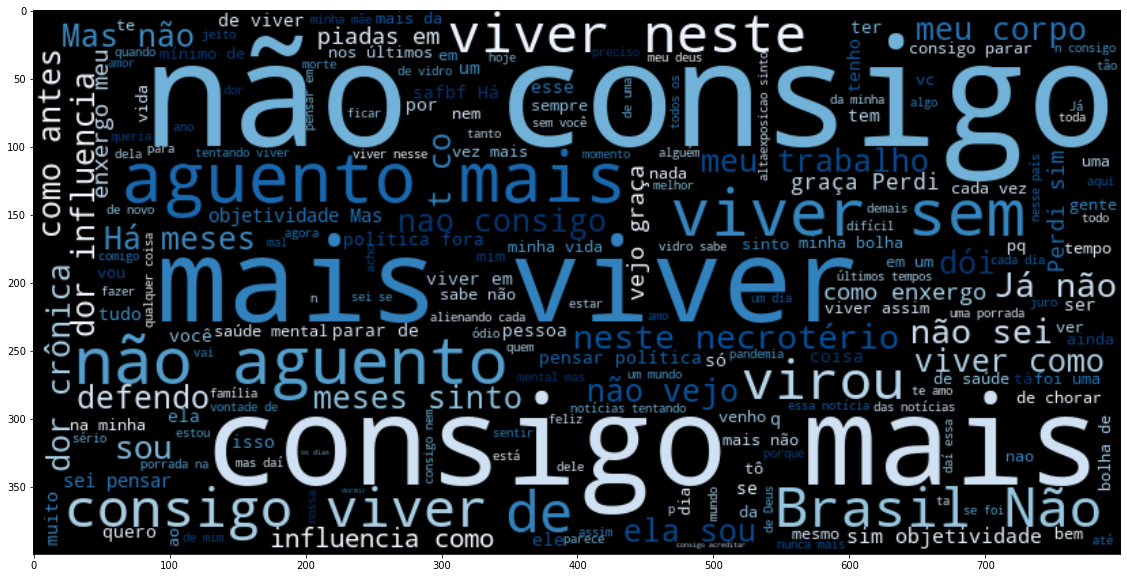

In [37]:
# WordCloud 1

palavras = " ".join(review for review in twitter_NAM.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(palavras)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "e", "pra", "o", "que", "t: co", "e ela", "paulo gustavo", "https", "Bolsonaro", "é", "veiadoscausos", "t  co", "Eu", "gustavo", "paulo  gustavo", "paulo"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(palavras)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

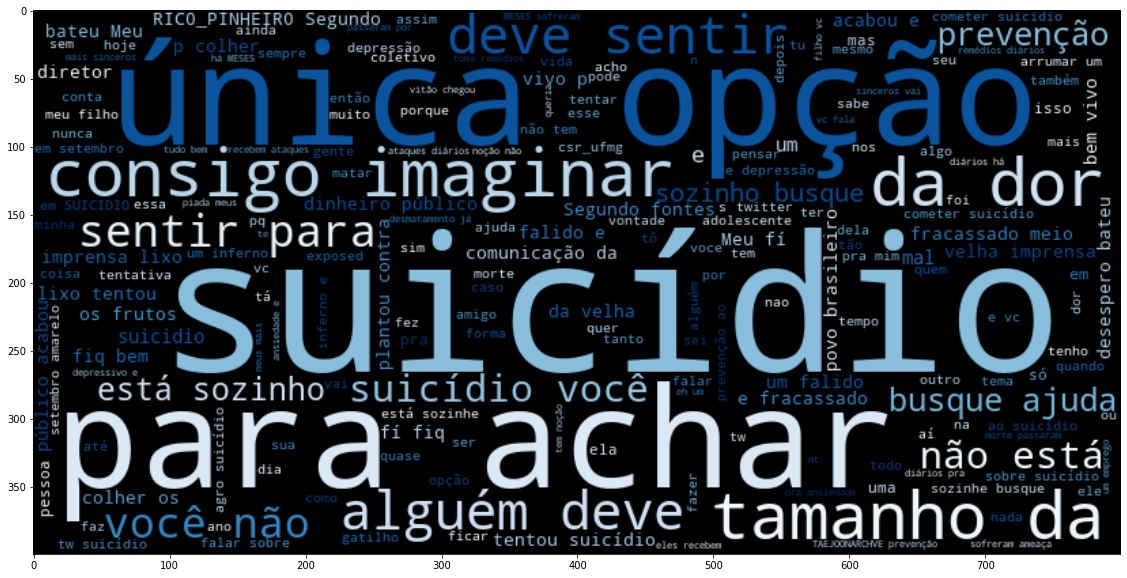

In [38]:
# WordCloud 2

palavras = " ".join(review for review in twitter_SC.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(palavras)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "ruuelmaa", "Nem", "NuXfIsTwjc", "byangells", "fuder", "whindersson", "mamata", "luisa", "RICO_PINHEIRO", "EstadaoFake", "que", "é", "da velha"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(palavras)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

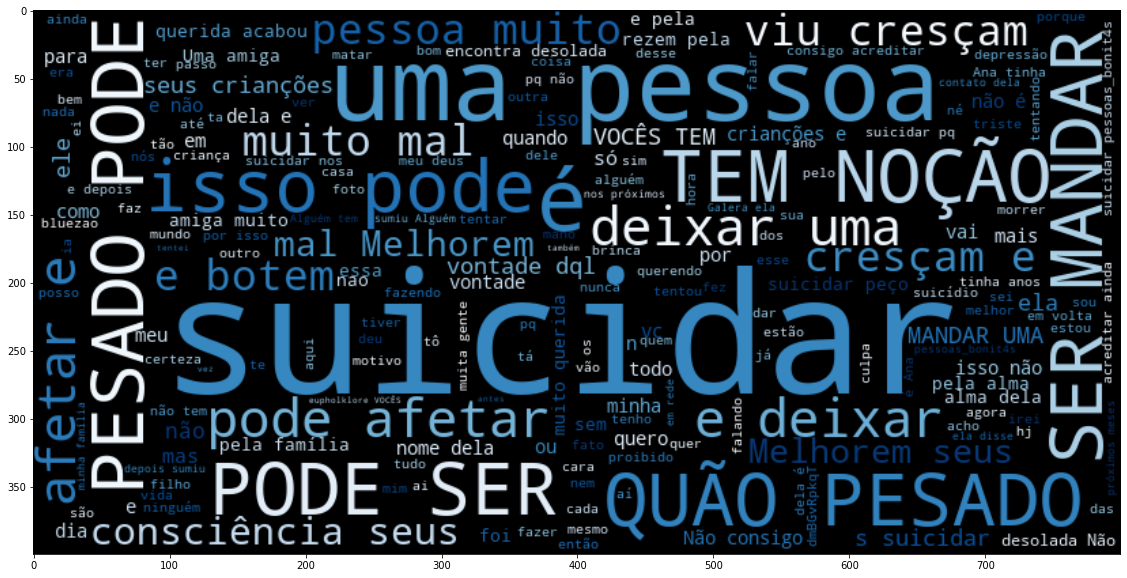

In [40]:
# WordCloud 3

palavras = " ".join(review for review in twitter_SD.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(palavras)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "porra", "imbecis", "Ldivino_ribeiro", " porra ", "que", "pra", "na", "da", "um", "mão", "copypasta", "LuanaCarolitaaa"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(palavras)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Análise dos relatórios mensais do CVV (Centro de Valorização a Vida)

Lendo os dados dos relatórios mensais do CVV, observamos que havia aspectos essenciais para analisar e gerar um conhecimento maior para nossa pesquisa, os números de ligações atendidas e perdidas, os números de ligação por cada região do Brasil, o tempo médio das ligação atendidas e a maneira de realização do atendimento, sendo remoto ou físico, todos essenciais para certo entendimento. 
 
O gráfico 1 mostra o volume de ligações atendidas no Brasil há cada mês, e foi uma surpresa para nós vermos que mais de 210 mil pessoas procuram por atendimento e tem sucesso, isso pode parecer pouco observando toda a população brasileira, porém devemos considerar que são mais de 210 mil pessoas pedindo ajuda para estranhos porque não conseguem ou não tem uma pessoa próxima para pedir ajuda, todas essas pedem assistência por ligação, então imagine quantas não pedem por e-mail, pelo chat, ou mesmo quantas não tem suas ligações atendidas como mostra o 2 gráfico, pois bem agora os números já parecem maiores não? mas ainda não acabou pois diversos indivíduos não chegam a pedir ajuda seja por um bloqueio pessoal, por falta de acesso, ou até mesmo pelo medo de serem julgados de alguma forma. O tabu que a sociedade impõe no tema do suicídio vem corrompendo indivíduos com o medo de serem julgados, mas se ao menos a população soubesse que basta de 7 a 9 minutos para dar assistência a alguém que necessita, segundo o gráfico 3, e todos falassem mais abertamente sobre o assunto, talvez este tabu diminuísse ou fosse tão pequeno que passaria despercebido. 

A curiosidade sobre as mudanças desses atendimentos na pandemia nos foi despertada e decidimos por analisar a taxa de atendimentos físicos e remotos no período de entrada da pandemia e durante, foi interessante notar no gráfico 4 que antes a ida ao local era o meio mais utilizado pelos usuários, mas com a entrada da pandemia o método remoto foi tomando conta e com isso a demanda maior de profissionais tecnologicamente capacitados, afinal o CVV não só atende por telefone, mas segundo seu site oficial, podem ser trocadas mensagens, e-mails e ligações por vídeo. O pico de ligações perdidas em novembro de 2020, no gráfico 3, foi época de iniciação dos treinamentos para interessados em ajudar o centro, depois elas voltam a ser mais baixas, mas ainda assim com números altos, é nessa parte que entramos com a ideia de fornecer uma colaboração, uma ajuda diferente para quem está precisando e não está conseguindo neste momento tão tenso e frustrante para todos. Aqueles que sentem a necessidade de ir ao local fisicamente demonstram para nossa análise que sabem seu nível de preocupação e que tentativas remotas não são suficientes, mas para aqueles que o remoto está sendo suficiente, imagine se esses pudessem ao invés ou além de usar o CVV, utilizar da cooperação e suporte de seus entes próximos de uma maneira simples, mas eficaz.


### Importando os dados

In [42]:
# Gráficos

colunas = ["mes", "ano", "vla", "vlp", "ar", "af", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba"]
dados_cvv= pd.read_csv('./Data/CVV_analise.csv', sep=";", header=0, names=colunas)
dados_cvv.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525


In [43]:
# Gráficos 

def converter_tempo_numero(x):
    return int(x[3:5]) + int(x[6:8])/60
    
dados_cvv['mt'] = dados_cvv.mtp.apply(converter_tempo_numero)

In [44]:
# Gráficos

dados_cvv["mes_ano"] = dados_cvv["ano"].apply(int)
dados_cvv["mes_ano"] = dados_cvv["mes_ano"].apply(str)
dados_cvv["mes_ano"] = dados_cvv["mes"] + " " + dados_cvv["mes_ano"]
dados_cvv.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba,mt,mes_ano
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633,6.733333,Janeiro 2020
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570,6.800000,Fevereiro 2020
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996,7.183333,Março 2020
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614,7.233333,Abril 2020
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103,7.733333,Maio 2020
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466,7.766667,Junho 2020
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897,7.716667,Julho 2020
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525,7.166667,Agosto 2020


In [46]:
# Gráfico 4

atendimento = dados_cvv.drop(["mes", "ano", "vla", "vlp", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba", "mt"], axis = 1)
atendimento.dropna(inplace=True)
atendimento.head(8)

,ar,af,mes_ano
0,27819,283897,Janeiro 2020
1,22627,260760,Fevereiro 2020
2,41438,213860,Março 2020
3,151672,90856,Abril 2020
4,156779,76151,Maio 2020
5,148352,71252,Junho 2020
6,157988,75937,Julho 2020
7,173893,85026,Agosto 2020


In [47]:
# Gráfico 5

cidades = dados_cvv.drop(['mes','ano','vla','vlp','ar','af','mtp', 'mt'], axis = 1)
cidades.head(8)

,nsp,nrj,nmg,nrs,npe,npr,nba,mes_ano
0,88545,38875,36803,40858,20153,11846,12633,Janeiro 2020
1,75267,34067,33565,33160,21350,11529,14570,Fevereiro 2020
2,77484,32909,29863,29029,18684,12797,14996,Março 2020
3,74228,30847,30187,25305,25305,11727,14614,Abril 2020
4,67817,29831,28306,25871,16572,11892,13103,Maio 2020
5,68229,26277,24833,24595,15312,12472,12466,Junho 2020
6,77131,29349,26735,26212,13286,13755,12897,Julho 2020
7,81909,28007,28676,31043,15708,15809,17525,Agosto 2020


### Gerando os gráficos

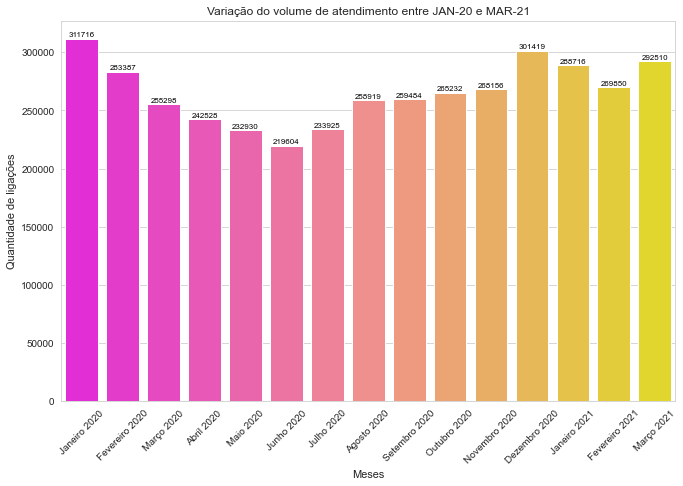

In [48]:
# Gráfico 1

sns.set_style('whitegrid')
ax = sns.barplot(data = dados_cvv, x = "mes_ano", y = "vla", errwidth=0, palette= 'spring')
ax.set_title('Variação do volume de atendimento entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

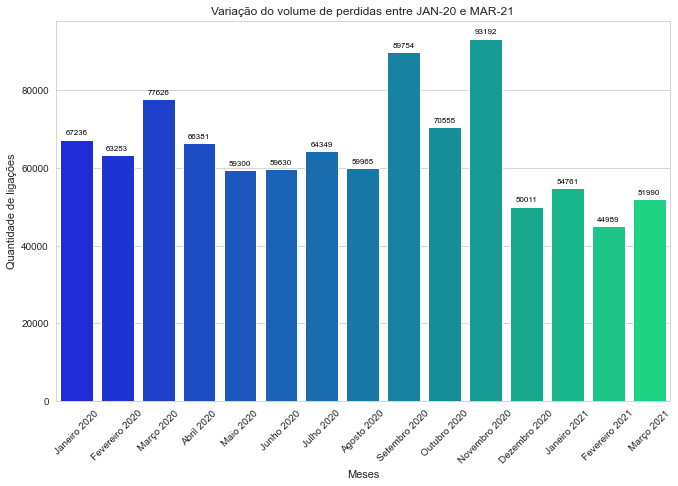

In [49]:
# Gráfico 2

sns.set_style('whitegrid')
ax = sns.barplot(data = dados_cvv, x = "mes_ano", y = "vlp", errwidth=0, palette='winter')
ax.set_title('Variação do volume de perdidas entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

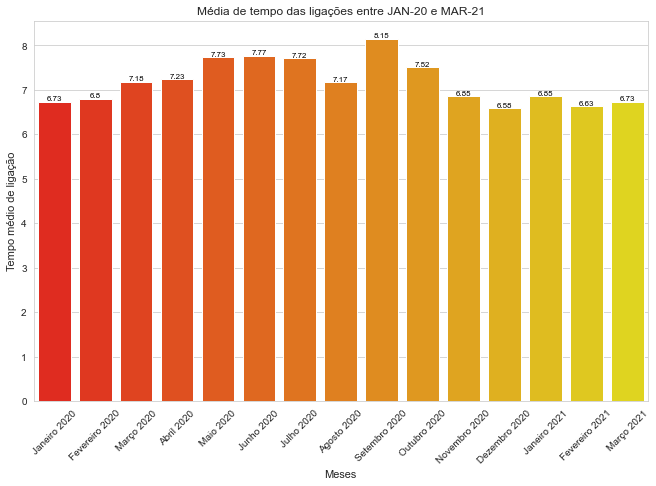

In [50]:
# Gráfico 3

sns.set_style('whitegrid')
ax = sns.barplot(data = dados_cvv, x = "mes_ano", y = "mt", errwidth=0, palette= 'autumn')
ax.set_title('Média de tempo das ligações entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Tempo médio de ligação', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(round(i.get_height(),2), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

In [17]:
# Gráfico 4

graf1 = go.Bar(x=atendimento['mes_ano'], y=atendimento["af"], name = 'Físico', marker = {'color': '#00ced1'})
graf2 = go.Bar(x=atendimento['mes_ano'], y=atendimento["ar"], name = 'Remoto', marker = {'color': '#fa8072'})
data = [graf1, graf2]
layout = go.Layout(title='Classificação dos atendimentos entre JAN-20 e MAR-21',
                   yaxis={'title':'Quantidade de atendimentos'},
                   xaxis={'title': 'Meses'},
                   barmode="stack", height=600, width=1000)
fig = go.Figure(data= data, layout=layout)                
py.iplot(fig)

In [297]:
# Gráfico 5 

SP= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['nsp'],
                    mode='lines+markers',
                    name='SP', line = dict(color='deeppink', width=2))
RJ= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['nrj'],
                    mode='lines+markers',
                    name='RJ', line = dict(color='darkorange', width=2))
MG= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['nmg'],
                    mode='lines+markers',
                    name='MG', line = dict(color='purple', width=2))                    
RS= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['nrs'],
                    mode='lines+markers',
                    name='RS', line = dict(color='deepskyblue', width=2))
PE= go.Scatter(x=dados_cvv['mes_ano'], y=dados['npe'],
                    mode='lines+markers',
                    name='PE', line = dict(color='limegreen', width=2))
PR= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['npr'],
                    mode='lines+markers',
                    name='PR', line = dict(color='yellow', width=2))
BA= go.Scatter(x=dados_cvv['mes_ano'], y=dados_cvv['nba'],
                    mode='lines+markers',
                    name='BA', line = dict(color='gray', width=2))
data= [SP, RJ, MG, RS, PE, PR, BA]
layout= go.Layout(title={
                    'text' : 'Número de ligações por região entre JAN-20 e MAR-21',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Quantidade de ligações'},
                   xaxis={'title': 'Meses', 'tickangle' : 45},
                   legend_title="Regiões:",
                   height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

## Análise do Google trends na busca por suicídio

Com o auxílio da plataforma do google trends, pesquisamos sobre o assunto suicídio e ele nos trouxe de resultado a frequência de acesso e pesquisa sobre o assunto em 2019 e 2020. O gráfico 1 mostra a frequência de pesquisas relacionada ao suicídio pode-se notar que houve dois picos de pesquisa em junho e setembro, do qual somente setembro temos a causa por ser o mês da conscientização ao suicídio, mostrando que ano de 2020 houve uma popularização do assunto quando comparado aos anos anteriores pela piora da saúde mental das pessoas durante essa pandemia que grande maioria da população não tinha a menor ideia do assunto. Enquanto, o gráfico 2, que também é de pesquisas, apresenta somente três países específicos (Brasil, Estados Unidos e Japão) demonstrando que o Japão tem a maior taxa de pesquisas por possuir o maior tabu e negligencia com o assunto do suicídio, causando uma necessidade da população saber sobre o assunto por meios mais anonimatos, ao invés de se dirigirem para pessoas ou meios públicos de pesquisa, diferentemente dos Estados Unidos e Brasil que apesar de possuírem um tabu grande, suas pesquisas continuam com uma estabilidade. Por fim, o gráfico 3 mostra a porcentagem de pesquisas comparando os anos de 2019 e 2020 sobre o assunto suicídio mundialmente, podemos notar que os países Japão e Bélgica foram os que apresentaram um crescimento nas porcentagens de 2019 para 2020, porque isso mostra que países desenvolvidos como estes, que se encontram nas posições 19° e 14º do Ranking de IDH, ainda tem problemas para retratar assuntos tão necessários e presentes na sociedade, enquanto países menos desenvolvidos como Brasil, que está na posição 84°, e que possuem acesso necessário as pesquisas tem porcentagens de pesquisa mais baixas.

### Importando os dados

In [19]:
# Gráfico 1

colunas = ['semana_2020', 'porcentagem_2020', 'semana_2019', 'porcentagem_2019']
suicide_searches = pd.read_csv(r'./Data/multiTimeline.csv', sep=',', header=0, names=colunas)

#suicide_searches.info()
suicide_searches.head(8)

,semana_2020,porcentagem_2020,semana_2019,porcentagem_2019
0,2020-01-05,53,2019-01-06,52
1,2020-01-12,50,2019-01-13,50
2,2020-01-19,53,2019-01-20,50
3,2020-01-26,51,2019-01-27,49
4,2020-02-02,49,2019-02-03,67
5,2020-02-09,51,2019-02-10,53
6,2020-02-16,63,2019-02-17,56
7,2020-02-23,51,2019-02-24,61


In [20]:
# Gráfico 2

colunas = ['Semana','Japão', 'Brasil', 'Estados Unidos']
bra_eua_jap_searches= pd.read_csv(r'./Data/multiTimeline cópia.csv', sep= ',', header=0, names=colunas)
#bra_eua_jap_searches = bra_eua_jap_searches.drop([0,1], axis=0)

#bra_eua_jap_searches.info()
bra_eua_jap_searches.head(8)

,Semana,Japão,Brasil,Estados Unidos
0,2020-01-05,26,11,13
1,2020-01-12,16,10,15
2,2020-01-19,13,14,16
3,2020-01-26,16,12,15
4,2020-02-02,16,11,15
5,2020-02-09,14,10,15
6,2020-02-16,22,11,17
7,2020-02-23,14,10,15


In [21]:
# Gráfico 3

geo = pd.read_csv("./Data/geoMap.csv", header=0, names=['pais', '2020', '2019'])
geo.dropna(inplace=True)

# geo.info()
geo.head(8)

,pais,2020,2019
0,Japão,58,42
1,Paraguai,38,62
2,Irã,51,49
3,Colômbia,37,63
4,Coreia do Sul,50,50
5,Turquia,44,56
6,Estados Unidos,47,53
7,Brasil,41,59


### Gerando os gráficos

In [298]:
# Gráfico 1

ano_20= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2020'],
                    mode='lines+markers',
                    name='2020', line = dict(color='crimson', width=2))
ano_19= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2019'],
                    mode='lines+markers',
                    name='2019', line = dict(color='lightseagreen', width=2))
data= [ano_20, ano_19]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Janeiro até Dezembro de 2019 e 2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisas'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Anos:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [299]:
# Gráfico 2

J= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Japão'],
                    mode='lines+markers',
                    name='JAPÃO', line = dict(color='purple', width=2))
B= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Brasil'],
                    mode='lines+markers',
                    name='BRA', line = dict(color='limegreen', width=2))
E= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Estados Unidos'],
                    mode='lines+markers',
                    name='EUA', line = dict(color='darkorange', width=2))
data= [J, B, E]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisas'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Países:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [300]:
# Gráfico 3

graf1 = go.Bar(x=geo["pais"], y=geo["2019"], name = '2019', marker = {'color': 'lightseagreen'})
graf2 = go.Bar(x=geo["pais"], y=geo["2020"], name = '2020', marker = {'color': 'crimson'})
data = [graf1, graf2]
layout = go.Layout(title='Comparação de pesquisas sobre suicídio entre 2019 e 2020',
                   yaxis={'title':'Porcentagem de pesquisas'},
                   xaxis={'title': 'Países'},
                   barmode="stack",
                   height=600, width=1000)
fig = go.Figure(data=data, layout=layout)                
py.iplot(fig)

In [302]:
# Gráfico 4 

paises=["BRA", "EUA", "JAP", "BEL"]

fig = go.Figure(data=[
    go.Bar(name='2019', x=paises, y=[13520, 47511, 20169, 2098], marker = {'color': 'lightseagreen'}),
    go.Bar(name='2020', x=paises, y=[12256, 44834, 20081, 2656], marker = {'color': 'crimson'})
], layout= layout)
layout = go.Layout(title='Números absolutos de suicídios em quatro Países',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Países'})

fig.update_layout(barmode='group')
fig.show()

## Análise do número de vítimas de suicídio no Brasil em 2019 e 2020

A importância da análise dos casos de suicídio no Brasil visa um aprofundamento na pesquisa e nas correlações com os outros dados. O gráfico 4 da análise do Google Trends na busca por suicídio indica os números absolutos de suicídios no Brasil no ano de 2019 e 2020, ao compara-los notamos que apesar dos casos terem diminuído em 2020, no período da pandemia do Coronavírus, essa diminuição foi consideravelmente pequena, uma média 1360 pessoas, demonstrando que a quarentena apesar de ser um agravador para desenvolvimentos de problemas psicológicos, segundo a CNN Brasil, teve seu ponto bom ao prevenir o suicídio para pessoas que vivem acompanhadas de alguém na faixa etária de 10 a 39 , como pode ser comprovado no gráfico 3 e 4, qual demonstra uma diminuição considerável nestas faixas etárias. Porém, na faixa etária de 70 a 80+ foi comprovado um crescimento daqueles indivíduos que acabaram por ficar sozinhos, isolados, grupos de risco se poder ver suas famílias, colegas, amigos...aumentando sua taxa de suicídio. 

Outro fator interessante além das idades são as mortes por estados, podemos observar no gráfico 2 a quantia de mortes absolutas dividias por estados e notar que o tabu do suicídio acontecer mais em estados de baixa eficiência está errado, já que o estado de São Paulo se encontra majoritariamente no Ranking de Eficiência dos Municípios da Folha em classificação de cidades com "eficiência", diferentemente de Roraima que mesmo obtendo classificação de cidades com "pouca eficiência". Apesar destas serem informações que comprovam a imprecisão da superstição, algumas pessoas podem ainda dizer que a população de Roraima é muito menor do que a de São Paulo e por isso existem menos mortes, de fato isto é algo a considerar, porém quando fazemos os cálculos das porcentagens de mortes por população, em SP obtemos um total de 0,52% em 2019 e 0,49% em 2020, enquanto em Roraima a porcentagem foi de 0,61% em 2019 e 0,55% em 2020, ou seja indica que as mortes de Roraima são maiores porém ainda muito similares as de São Paulo a ponto de não considerarmos a existência do tabu, mas sim de um pequeno agravamento. Podem achar que só o Brasil pode ser um exemplo fraco para descomprouver este tabu, porém ao analisarmos os casos de suicídio nos Estados Unidos, observamos que o estado com mais vítimas, no gráfico 3 da análise do número de vítimas de suicídio do Estados Unidos em 2019 e 2020, é a California que se encontra na 24° em posição, no Ranking de Melhores Estados da U.S. News, enquanto o estado com a menor taxa de suicídio é Rhode Island, que está na posição 34°, comprovando que um estado de melhor métricas não necessariamente é o que terá menos casos de suicídio, e já que no do Brasil fizemos as porcentagens de mortes por suicídio calculando a dos Estados Unidos, em CA obtemos um total de 0,01% em 2019 e 0,01% em 2020, enquanto em RI a porcentagem foi de 0,01% em 2019 e 0,009% em 2020, ou seja a superstição feita pela sociedade é derrubada quando as porcentagens de vítimas são iguais ou como em 2019 a porcentagem do estado pior é mais baixa.

Além disso, a ligação entre os estados do Brasil e seus casos de suicídio, gráficos 2 com o gráfico 5 da análise dos relatórios mensais do CVV (Centro de Valorização a Vida) é muito interessante ao notarmos que a região com mais caso é a que mais faz atendimentos, São Paulo é um estado com uma diversidade étnica, cultural e social imensa, mas que também possui uma alta tecnologia que grande parte da população utiliza, mais especificamente 79,3% da população, segundo o IBGE, possui um celular pelo menos, isso relaciona a alta taxa de atendimento no estado e também demonstra que não só São Paulo mas todas as regiões com taxas de mortes por suicídio acompanham uma taxa razoavelmente alta de ligações, sempre maior do que a quantidade de mortes mensais de acordo com a análise feita nas tabelas de relatórios mensais do CVV.

### Importando os dados

In [19]:
# Gráfico 1

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([99, 100, 108, 118, 127, 123])
# display(df)
# df.head(8)

df_2019 = df.loc[ df['data'] == '2019' ]
df_2019.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
101,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,13.0,13.0,17.0,10.0,8.0,10.0,13.0,9.0,12.0,9.0,12.0,14.0,140.0
102,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,8.0,4.0,6.0,6.0,6.0,3.0,5.0,7.0,7.0,3.0,8.0,9.0,72.0
103,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,18.0,17.0,16.0,21.0,23.0,21.0,26.0,24.0,19.0,20.0,23.0,25.0,253.0
104,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,2.0,3.0,8.0,5.0,3.0,2.0,5.0,8.0,6.0,3.0,1.0,4.0,50.0


In [20]:
# Gráfico 2

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([132, 133, 141, 151, 156, 160])
# display(df)
# df.head(8)

df_2020 = df.loc[ df['data'] == '2020*' ]
df_2020.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
134,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,14.0,12.0,11.0,9.0,9.0,13.0,10.0,10.0,13.0,18.0,8.0,10.0,137.0
135,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,7.0,6.0,4.0,8.0,6.0,8.0,3.0,5.0,5.0,7.0,5.0,7.0,71.0
136,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,35.0,23.0,25.0,25.0,30.0,22.0,28.0,18.0,28.0,21.0,26.0,33.0,314.0
137,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,9.0,0.0,2.0,3.0,5.0,3.0,5.0,2.0,3.0,0.0,1.0,2.0,35.0


In [21]:
# Gráfico 1 e 2

def calc_raio(n):
    if (n < 0):
        return 0
    return (int((np.log(n + 1.00001))) + 0.2) * 1000

In [22]:
# Gráfico 3 e 4

df = pd.read_csv('./Data/grupoetarioXano.csv', sep= ';')
df = df.drop(['local (uid)', 'ano (uid)', 'abrangencia (uid)', 'pais (uid)', 'indicador (uid)', 'lococor (nome)', 'estatistica (uid)', 'categoria (nome)', 'categoria (uid)', 'lococor (uid)', 'atestante (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (nome)', 'local (nome)', 'grupoetario (uid)', 'atestante (nome)'], axis=1)
df = df.drop([42, 43, 56, 57])
df.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
0,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Infantil,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,01 a 04,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,0,0,0,0,0,1,0,0,3,0,0,0,4
3,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,9,5,13,15,11,7,8,13,16,17,11,18,143


In [23]:
# Gráfico 3

dfl_2019 = df.loc[ df['ano (nome)'] == '2019' ]
dfl_2019.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
44,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,0,0,1,0,0,1,0,0,0,0,0,0,2
45,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,12,8,14,15,17,8,23,18,21,21,17,15,189
46,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,15 a 19,78,73,91,90,82,75,75,79,115,87,91,86,1022
47,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,20 a 29,230,227,261,230,239,216,228,229,238,246,247,249,2840


In [24]:
# Gráfico 3

df_teste = dfl_2019.drop(55).loc[:,'Janeiro':'Dezembro'].T
df_teste.columns = dfl_2019['grupoetario (nome)'][:11]
df_teste

grupoetario (nome),05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 e +,Branco/Ignorado
Janeiro,0,12,78,230,218,206,178,107,58,24,1
Fevereiro,0,8,73,227,204,187,157,95,54,23,0
Março,1,14,91,261,247,225,191,107,64,17,4
Abril,0,15,90,230,238,204,162,101,60,20,3
Maio,0,17,82,239,238,189,161,120,65,33,1
Junho,1,8,75,216,226,190,140,122,55,21,0
Julho,0,23,75,228,220,177,188,93,57,25,0
Agosto,0,18,79,229,228,199,157,102,69,21,1
Setembro,0,21,115,238,213,218,170,109,60,30,0
Outubro,0,21,87,246,237,194,166,110,56,17,0


In [25]:
# Gráfico 4

dfl_2020 = df.loc[ df['ano (nome)'] == '2020*' ]
dfl_2020.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
58,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,1,0,0,0,0,1,1,0,0,0,0,0,3
59,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,8,13,12,10,15,16,11,15,13,13,14,7,147
60,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,15 a 19,83,92,100,60,67,72,62,77,63,91,75,73,915
61,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,20 a 29,234,239,228,198,184,171,180,175,233,223,235,199,2499


In [26]:
# Gráfico 4

df_teste1 = dfl_2020.drop(69).loc[:,'Janeiro':'Dezembro'].T
df_teste1.columns = dfl_2020['grupoetario (nome)'][:11]
df_teste1

grupoetario (nome),05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 e +,Branco/Ignorado
Janeiro,1,8,83,234,244,222,177,124,68,28,3
Fevereiro,0,13,92,239,214,186,148,116,67,25,2
Março,0,12,100,228,197,184,154,111,61,30,0
Abril,0,10,60,198,185,178,153,105,57,24,0
Maio,0,15,67,184,200,182,165,90,47,25,1
Junho,1,16,72,171,204,168,128,88,75,26,2
Julho,1,11,62,180,186,170,147,109,62,20,0
Agosto,0,15,77,175,166,183,145,89,69,38,2
Setembro,0,13,63,233,182,195,159,97,58,17,5
Outubro,0,13,91,223,181,184,153,130,62,21,1


In [27]:
# Gráfico 5

dfs = pd.read_csv('./Data/sexo.csv', sep= ';')
dfs = dfs.drop(['local (uid)', 'ano (uid)', 'abrangencia (uid)', 'pais (uid)', 'indicador (uid)', 'lococor (nome)', 'estatistica (uid)', 'categoria (nome)', 'categoria (uid)', 'lococor (uid)', 'atestante (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (nome)', 'local (nome)', 'grupoetario (uid)', 'atestante (nome)'], axis=1)
dfs = dfs.drop([3])
dfs#.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),grupoetario (nome),racacor (nome),sexo (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
0,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Feminino,231.0,226.0,256.0,203,198,181,207,225,233.0,214.0,225.0,201,2.600
1,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Masculino,960.0,876.0,821.0,767,778,770,741,734,788.0,845.0,813.0,761,9.654
2,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Branco/Ignorado,1.0,0.0,0.0,0,0,0,0,0,1.0,0.0,0.0,0,2.000


In [28]:
# Gráfico 5

dfst = dfs.loc[:,'Janeiro':'Dezembro'].T
dfst.columns = dfs['sexo (nome)']
dfst

sexo (nome),Feminino,Masculino,Branco/Ignorado
Janeiro,231.0,960.0,1.0
Fevereiro,226.0,876.0,0.0
Março,256.0,821.0,0.0
Abril,203.0,767.0,0.0
Maio,198.0,778.0,0.0
Junho,181.0,770.0,0.0
Julho,207.0,741.0,0.0
Agosto,225.0,734.0,0.0
Setembro,233.0,788.0,1.0
Outubro,214.0,845.0,0.0


In [29]:
# Gráfico 6 e 7

df = pd.read_csv('./Data/racacorXano.csv', sep= ';')
df = df.drop(['local (uid)', 'ano (uid)', 'abrangencia (uid)', 'pais (uid)', 'indicador (uid)', 'lococor (nome)', 'estatistica (uid)', 'categoria (nome)', 'categoria (uid)', 'lococor (uid)', 'atestante (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (nome)', 'local (nome)', 'grupoetario (uid)', 'atestante (nome)'], axis=1)
df = df.drop([27, 34])
df.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),grupoetario (nome),sexo (nome),racacor (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
0,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Branca,489.0,486.0,467.0,458.0,443.0,427.0,457.0,453.0,489.0,525.0,482.0,519.0,5.695
1,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Preta,52.0,41.0,44.0,51.0,53.0,45.0,63.0,43.0,38.0,60.0,51.0,53.0,594.000
2,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Amarela,4.0,2.0,2.0,5.0,3.0,1.0,1.0,8.0,4.0,4.0,3.0,5.0,42.000
3,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Parda,353.0,355.0,390.0,352.0,385.0,375.0,375.0,384.0,408.0,418.0,451.0,434.0,4.680


In [30]:
# Gráfico 6

dfl_19 = df.loc[ df['ano (nome)'] == '2019' ]
dfl_19t = dfl_19.loc[:,'Janeiro':'Dezembro'].T
dfl_19t.columns = dfl_19['racacor (nome)']
dfl_19t

racacor (nome),Branca,Preta,Amarela,Parda,Indígena,Branco/Ignorado
Janeiro,534.0,63.0,2.0,496.0,6.0,11.0
Fevereiro,512.0,52.0,1.0,437.0,14.0,12.0
Março,599.0,62.0,3.0,530.0,11.0,17.0
Abril,549.0,43.0,2.0,503.0,15.0,11.0
Maio,558.0,66.0,1.0,495.0,12.0,13.0
Junho,516.0,52.0,1.0,465.0,8.0,12.0
Julho,531.0,56.0,3.0,466.0,14.0,16.0
Agosto,528.0,57.0,5.0,487.0,14.0,12.0
Setembro,599.0,53.0,3.0,486.0,11.0,22.0
Outubro,558.0,66.0,2.0,485.0,8.0,15.0


In [31]:
# Gráfico 7

dfl_20 = df.loc[ df['ano (nome)'] == '2020*' ]
dfl_20t = dfl_20.loc[:,'Janeiro':'Dezembro'].T
dfl_20t.columns = dfl_20['racacor (nome)']
dfl_20t

racacor (nome),Branca,Preta,Amarela,Parda,Indígena,Branco/Ignorado
Janeiro,591.0,70.0,3.0,500.0,14.0,14.0
Fevereiro,554.0,65.0,3.0,467.0,4.0,9.0
Março,519.0,58.0,1.0,473.0,10.0,16.0
Abril,442.0,61.0,3.0,437.0,11.0,16.0
Maio,467.0,42.0,2.0,444.0,10.0,11.0
Junho,436.0,51.0,6.0,432.0,13.0,13.0
Julho,462.0,45.0,4.0,412.0,10.0,15.0
Agosto,463.0,50.0,3.0,419.0,11.0,13.0
Setembro,467.0,63.0,5.0,466.0,14.0,7.0
Outubro,506.0,52.0,5.0,477.0,8.0,11.0


### Gerando o gráfico

In [43]:
# Gráfico 1

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2019.iloc[0]['data']

df_sorted = df_2019.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2019 ",
xaxis_title = "Estados",
yaxis_title = "Número de mortes",
width = 1400, height= 800)
fig.show()

In [34]:
# Gráfico 2

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2020.iloc[0]['data']

df_sorted = df_2020.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2020 ",
xaxis_title = "Estados",
yaxis_title = "Número de mortes",
width = 1400, height= 800)
fig.show()

In [15]:
# Gráfico 3

#px.line(dfl_2019.drop(55).loc[:,'Janeiro':'Dezembro'].T)
fig= px.scatter(df_teste, title='Número de mortes de suicídio por faixa etária em 2019', color_discrete_sequence= px.colors.qualitative.Light24, 
        labels={
            "value":"Número de mortes",
            "index":"Meses de 2019",
            "grupoetario (nome)":"Grupos etários:"
}).update_traces(mode='markers+lines')
fig

In [16]:
# Gráfico 4

#px.line(dfl_2020.drop(55).loc[:,'Janeiro':'Dezembro'].T)
fig= px.scatter(df_teste1, title='Número de mortes de suicídio por faixa etária em 2020', color_discrete_sequence= px.colors.qualitative.Light24, 
        labels={
            "value":"Número de mortes",
            "index":"Meses de 2020",
            "grupoetario (nome)":"Grupos etários:"
}).update_traces(mode='markers+lines')
fig

In [40]:
# Gráfico 5

fig= px.bar(dfst, title='Número de mortes de suicídio por genero em 2020 no Brasil', color_discrete_sequence= ['deeppink', 'blue', 'limegreen'], 
        labels={
            "value":"Número de mortes",
            "index":"Meses de 2020",
            "sexo (nome)":"Genêros:"
})#.update_traces(mode='markers+lines')
fig

In [17]:
# Gráfico 6  

fig= px.scatter(dfl_19t, title='Número de mortes de suicídio por raça/cor em 2019', color_discrete_sequence= ['pink', 'black', 'yellow', 'brown', 'goldenrod', 'purple'], 
        labels={
            "value":"Número de mortes",
            "index":"Meses de 2019",
            "racacor (nome)":"Raça/cor:"
}).update_traces(mode='markers+lines')
fig

In [18]:
# Gráfico 7 

fig= px.scatter(dfl_20t, title='Número de mortes de suicídio por raça/cor em 2020', color_discrete_sequence= ['pink', 'black', 'yellow', 'brown', 'goldenrod', 'purple'], 
        labels={
            "value":"Número de mortes",
            "index":"Meses de 2020",
            "racacor (nome)":"Raça/cor:"
}).update_traces(mode='markers+lines')
fig

## Análise do número de vitímas de suicídio do Estados Unidos em 2019 e 2020

O gráfico 1 é muito representativo e significativo para nosso trabalho, tanto ele como o gráfico 5 da Análise do número de vítimas de suicídio do Brasil em 2019 e 2020, apresentam em seus dados que a maioria das mortes são do gênero masculino, e nossas pesquisas demonstram que, segundo o site G1 e NY Times, mulheres recorrem muito mais a ajuda médica e psicológica do que homens, pois esses tem em sua mentalidade de que recorrer a ajuda deixa os mais fracos porém, isso só é refletido por eles porque a sociedade vem implementando há séculos o rótulo da masculinidade frágil para homens que não são fortes, resistentes, ficam doentes, precisam de ajuda para saúde mental e física, e demonstram emoções, tudo isso é um grande agravador dos motivos da mortalidade de homens  ser três vezes maior ou até representar 75% dos casos de suicídio.

Os gráficos 2 e 3 de mortes de suicídio por Estado demonstram que usando eles em comparação com os gráficos 1 e 2 da Análise do número de vítimas de suicídio do Brasil em 2019 e 2020 comparamos que não só no Brasil, mas nos Estados Unidos também sempre há uma região com maior número de casos, está em ambos os casos é a região mais habitada de todo o país, o que faz sentido quando levado em conta os tamanhos das populações em relação aos casos.

Apesar de não existirem notícias especificas sobre o assunto as pessoas discutem muito sobre as disparidades raciais e étnicas e uma falada é de que a maioria da população mundial acredita que a raça branca, com seus privilégios e maioridade privilegiada tem menos problemas em relação só todo, porém o gráfico 1 e os gráficos 6 e 7 da Análise do número de vítimas de suicídio do Brasil em 2019 e 2020 mostram que a etnia branca é a mais afetada pelo suicídio seguido pela preta, tanto no Brasil como nos Estados Unidos, com uma diferença alta entre as duas posições, isso porque apesar da população de brancos ser maior, está igual a preta possui seus problemas, na sua grande maioria diferente porém importante e significativo da mesma forma para o indivíduo, as pessoas brancas se vem privilegiadas e quando sem esperanças vem que tem praticamente tudo e pensam o que poderia ajudar e acabam por encontrar somente a mote como solução, enquanto a maioria dos negros se vem em posições muito inferiores que mesmo com muita dor e sofrimento podem crescer e sair de tudo que estão sentido ou passando. O interessante de observar a diferença de 2019 e 2020 no Brasil, é de que mesmo com a pandemia e as condições precárias maiores de muitos brasileiros, em sua maioria pretos, a taxa de suicídio dos negros alterou pouco e a dos branco só teve uma queda, mas não chegou a ficar abaixo da dos pretos.

### Importando os dados

In [10]:
# Gráfico 1

py.init_notebook_mode(connected=True)

df = pd.read_excel(r'./Data/Tabela 1.xlsx')
# Removendo as colunas desnecessários;
df = df.drop(columns=['Crude Rate','YPLL','Crude YPLL Rate','appliedFilters'])
# Removendo uma linha que não possui informações;
df = df.drop(8)
df
# Renomeando as colunas
df = df.rename(columns ={'Race': 'Raça', 'Sex':'Sexo','Number of Deaths': 'Número de mortes'})
df

,Raça,Sexo,Número de mortes
0,White,Males,"28,054"
1,White,Females,"8,152"
2,Black,Males,"2,511"
3,Black,Females,652
4,American Indian,Males,478
5,American Indian,Females,161
6,Asian/PI,Males,"1,064"
7,Asian/PI,Females,407


In [12]:
# Gráfico 2

suicidios_eua_19 = pd.read_csv(r'./Data/csv.csv')

suicidios_eua_19 = suicidios_eua_19.drop(columns=['URL', 'RATE'])

suicidios_eua_19.rename(columns={'YEAR': 'ano'}, inplace = True)
suicidios_eua_19.rename(columns={'STATE': 'estados'}, inplace = True)
suicidios_eua_19.rename(columns={'DEATHS': 'mortes'}, inplace = True)

suicidios_eua_19.head(8)

,ano,estados,mortes
0,2019,alabama,804
1,2019,alaska,210
2,2019,arizona,1419
3,2019,arkansas,548
4,2019,california,4436
5,2019,colorado,1312
6,2019,connecticut,435
7,2019,delaware,111


In [13]:
#calculo da mortes por estado com o número de a cada 1000000
def conta_mortos(x, y):
    return (x/100000)*y
    
def main():
    a = float( input("população: ") )
    b = float( input("porcentagem: ") )
    c = conta_mortos(a,b)
    print(c)

main()

254.22000000000003


In [14]:
# Gráfico 3

suicidios_eua_20 = pd.read_excel(r'./Data/eua_2020_estados.xlsx')
suicidios_eua_20.head(8)

,estados,mortes
0,West Virginia,387
1,Florida,3446
2,Illinois,1486
3,Minnesota,759
4,Maryland,661
5,Rhode Island,107
6,Idaho,438
7,New Hampshire,269


### Gerando os gráficos 

In [42]:
# Gráfico 1

trace1 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'], # Denominação das raças segundo o IBGE
                y = [28054, 2511, 478, 1064],
                name = 'Homens',
                marker = {'color': 'blue'})

trace2 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'],
                y = [8152, 652, 161, 407],
                name = 'Mulheres',
                marker = {'color': 'deeppink',})

layout = go.Layout(title='Taxa de Suicídio por Raça e Sexo em 2020 nos EUA',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Tipo de raça'})

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [37]:
# Gráfico 2

nm_coluna_x = 'estados'
nm_coluna_y = 'mortes'
qtde_municipios = 51

suicidios_eua_19_sorted = suicidios_eua_19.sort_values('mortes', ascending=False)

fig = px.scatter(suicidios_eua_19_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do EUA em 2019 ",
xaxis_title = "Estados",
yaxis_title = "Número de mortes",
width = 1400, height= 800)
fig.show()

In [36]:
# Gráfico 3

nm_coluna_x = 'estados'
nm_coluna_y = 'mortes'
qtde_municipios = 51

suicidios_eua_20_sorted = suicidios_eua_20.sort_values('mortes', ascending=False)

fig = px.scatter(suicidios_eua_20_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do EUA em 2020",
xaxis_title = "Estados",
yaxis_title = "Número de mortes",
width = 1400, height= 800)
fig.show()

## Web Scrapping da tabela da Wikipédia

O web scraping foi obtido da tabela de suicídios por país do site, fazendo a raspagem dos dados e limpando as linhas com as expressões regulares conseguimos obter um dataframe com os nomes, quantidade de mortes totais, só de homem e só de mulheres a cada 100 000 habitantes e adicionando pelo dataframe, colocamos as latitudes e longitudes de cada país por uma tabela do kaagle e dados da internet.

O gráfico 3 demonstra que o continente Africano possui as maiores taxas de suicídios, isso porque segundo diversos debates a grande maioria dos países dentro do continente tem altos índices de suicídios, pela falta de ajuda profissional e até pela falta de estudo mais abrangentes das causas. Os indicies de depressão e pensamentos suicidas são altos, com uma taxa de mais ou menos 5,5% por país. É interessante notar que os outros continentes não se encontram com um número muito afastado da África, a não ser o mediterrâneo oriental que chega parto da metade da porcentagem africana.

### Importando os dados

In [47]:
url_pagina = 'https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate'

In [48]:
pagina_html = requests.get(url_pagina)
pagina_html

<Response [200]>

In [49]:
soup = BeautifulSoup(pagina_html.content, 'html.parser')
# print(soup.prettify())

In [50]:
tb_suicidio = soup.find(class_='sortable mw-datatable static-row-numbers wikitable')

In [51]:
lines_tb = tb_suicidio.find_all('tr')

In [52]:
inicio_tb = 1
final_tb = 190

In [53]:
def prep_linha(line):
    line = line.strip("\n")
    line = line.strip(" ")
    line = line.replace(u"\xa0", u"")
    line = line.replace("\n","\t")
    line = re.sub(r"\[[\d|a-z]+\]", "",line)
    line = line.rstrip("\t")
    line = line.replace("\t\t", "\t")
    line = line.replace("–", "")
    
    return line

In [54]:
texto_fim = "País\tMortes a cada 100000 habitantes\tHomens\tMulheres\n"
for i in range(inicio_tb, final_tb+1):
    line = prep_linha(lines_tb[i].get_text())
    texto_fim += line
    texto_fim += "\n"
print(texto_fim)

País	Mortes a cada 100000 habitantes	Homens	Mulheres
Afghanistan†	6.0	6.2	5.7
Albania	3.7	5.3	2.2
Algeria	2.6	3.3	1.9
Angola	12.6	21.7	4.7
Antigua and Barbuda	0.3	0.0	0.6
Argentina	8.1	13.5	3.3
Armenia	2.7	4.9	1.0
Australia†	11.3	17.0	5.6
Austria	10.4	16.6	4.6
Azerbaijan	4.0	6.6	1.5
Bahamas	3.4	5.8	1.2
Bahrain	7.2	9.9	2.3
Bangladesh†	3.9	6.0	1.7
Barbados	0.3	0.5	0.2
Belarus†	16.5	30.1	5.3
Belgium	13.9	19.6	8.4
Belize	7.7	13.6	1.8
Benin	12.7	20.3	6.1
Bhutan†	5.1	6.8	3.1
Bolivia	6.8	9.6	4.2
Bosnia and Herzegovina	8.3	13.5	3.4
Botswana	20.2	35.5	7.8
Brazil	6.4	10.3	2.8
Brunei	2.5	4.2	0.8
Bulgaria	6.5	10.6	2.9
Burkina Faso	14.4	24.5	6.5
Burundi	12.1	18.9	6.4
Cape Verde	15.2	27.4	5.1
Cambodia	5.5	8.4	3.1
Cameroon†	15.9	25.2	7.6
Canada†	10.3	15.3	5.4
Central African Republic	23.0	39.6	9.3
Chad	13.2	20.2	6.9
Chile	8.0	13.4	3.0
China†	6.7	8.6	4.8
Colombia	3.7	6.0	1.7
Comoros	8.5	11.3	5.8
Congo	11.6	18.3	6.1
Costa Rica	7.6	13.3	1.9
Ivory Coast	15.7	25.7	5.0
Croatia	11.0	17.7	5.1
Cuba	10.2	16.7	

In [55]:
lin = lines_tb[1].get_text()
lin

'\n\xa0Afghanistan†\n6.0\n6.2\n5.7\n'

In [56]:
# arquivo = open("lis.suicidio.tsv", "w", encoding="utf-8" )
# arquivo.write(texto_fim)
# arquivo.close()

In [57]:
# Gráfico 1 e 2

df2 = pd.read_csv("./Data/lista-suicidio.tsv", sep=";")
df2 = df2.replace(np.NaN, 0)
df2

,País,Mortes a cada 100000 habitantes,Homens,Mulheres,Latitude,Longitude
0,Afghanistan,6.0,6.2,5.7,33.939110,67.709953
1,Albania,3.7,5.3,2.2,41.153320,20.168331
2,Algeria,2.6,3.3,1.9,36.450800,3.023100
3,Angola,12.6,21.7,4.7,-11.202692,17.873887
4,Antigua and Barbuda,0.3,0.0,0.6,17.060816,-61.796428
...,...,...,...,...,...,...
178,Venezuela,2.1,3.7,0.7,6.423750,-66.589730
179,Vietnam,7.2,10.6,4.2,14.058324,108.277199
180,Yemen,7.1,9.0,5.3,15.552727,48.516388
181,Zambia,14.4,25.7,5.3,-13.133897,27.849332


In [58]:
# df2.info()

In [70]:
# Gráfico 3

dfu= pd.read_csv("./Data/lis.suicidio.tsv", sep=";")
dfu= dfu.drop(1)
dfu

,País,Mortes a cada 100000 habitantes,Homens,Mulheres
0,Africa,11.2,18.0,5.2
2,South-East Asia,10.2,12.3,8.1
3,Europe,10.5,17.1,4.3
4,Eastern Mediterranean,6.4,9.2,3.5
5,Western Pacific,7.2,9.7,4.8
6,Global,9.0,12.6,5.4


### Gerando as ferramentas de análises

In [59]:
# Médias
print(df2['Mortes a cada 100000 habitantes'].mean())
print(df2['Homens'].mean())
print(df2['Mulheres'].mean())

10.08688524590164
16.139344262295083
4.528415300546448


In [60]:
# Medianas
print(df2['Mortes a cada 100000 habitantes'].median())
print(df2['Homens'].median())
print(df2['Mulheres'].median())

8.3
13.3
3.8


In [61]:
# Somas
print(df2['Mortes a cada 100000 habitantes'].sum())
print(df2['Homens'].sum())
print(df2['Mulheres'].sum())

1845.9
2953.5
828.6999999999999


In [63]:
# Desvio-padrões
print(df2['Mortes a cada 100000 habitantes'].std())
print(df2['Homens'].std())
print(df2['Mulheres'].std())

8.698821609152473
14.959821045770957
3.5985438450295106


In [64]:
# Gráfico 1

fig5 = px.bar(df2[:16], x='País', y='Mortes a cada 100000 habitantes', title='Os 15 primeiros países da lista', color='País')
fig5.show()

In [67]:
# Gráfico 2

nm_coluna_x = "País"
nm_coluna_y = "Mortes a cada 100000 habitantes"
qtde_paises= 15
data_analise = df2
df2_sorted = df2.sort_values('Mortes a cada 100000 habitantes', ascending=False)
fig4 = px.scatter(df2_sorted.head(qtde_paises),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)
fig4.update_layout(
title = "Países com mais mortes por suicídio a cada 100000 habitantes",
#xaxis_title = "Países",
#yaxis_title = "Quantidade de vítimas",
width = 1000, height= 700)
fig4.show()

In [81]:
fig5 = px.bar(dfu, x='País', y='Mortes a cada 100000 habitantes', title='Vítimas de suicídio por áreas do mundo', color='País', color_discrete_sequence= px.colors.qualitative.Pastel, labels={
            "País":"Áreas do mundo",
            "Europe":"Europa"
})
fig5.show()

## Mapa folium

O mapa feito pelo dataset do web scraping mostra que a maioria dos países tem suas taxas de mortes a cada 100000 de 0 a 24 porcento, porém Groenlândia, Lesoto, Guiana, Suazilândia são os único que ultrapassam essas taxas, com as maiores porcentagens sendo da Groenlândia com 83% e do Leso com 87.5%.

### Importando os dados

In [6]:
mapa = './Data/mapa.tsv'
df2 = pd.read_csv(mapa, sep=';')
df2

,País,Mortes a cada 100000 habitantes,Homens,Mulheres,Latitude,Longitude
0,Afghanistan,6.0,6.2,5.7,33.939110,67.709953
1,Albania,3.7,5.3,2.2,41.153320,20.168331
2,Algeria,2.6,3.3,1.9,36.450800,3.023100
3,Angola,12.6,21.7,4.7,-11.202692,17.873887
4,Antarctica,0.1,0.5,0.2,13.193887,-59.543198
...,...,...,...,...,...,...
186,Vietnam,7.2,10.6,4.2,14.058324,108.277199
187,Yemen,7.1,9.0,5.3,15.552727,48.516388
188,Zambia,14.4,25.7,5.3,-13.133897,27.849332
189,Zimbabwe,23.6,37.8,13.5,-19.015438,29.154857


In [7]:
df3= df2.drop(columns=['Homens', 'Mulheres'])
df3

,País,Mortes a cada 100000 habitantes,Latitude,Longitude
0,Afghanistan,6.0,33.939110,67.709953
1,Albania,3.7,41.153320,20.168331
2,Algeria,2.6,36.450800,3.023100
3,Angola,12.6,-11.202692,17.873887
4,Antarctica,0.1,13.193887,-59.543198
...,...,...,...,...
186,Vietnam,7.2,14.058324,108.277199
187,Yemen,7.1,15.552727,48.516388
188,Zambia,14.4,-13.133897,27.849332
189,Zimbabwe,23.6,-19.015438,29.154857


In [4]:
# df4.info()

### Gerando o mapa

In [8]:
df4 = df3.rename(columns={"Mortes a cada 100000 habitantes": "Mortes"})

world_map = folium.Map()

tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(world_map)

mapa= folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name = 'choropleth',
    data = df4,
    columns = ['País', 'Mortes'],
    key_on = 'feature.properties.name',
    bins= 7,
    fill_color='YlGnBu',
    nan_fill_color='white',
    fill_opacity=0.6,
    line_opacity=0.4,
    smooth_factor=0,
    legend_name='Mortes a cada 100000 habitantes'
).add_to(world_map)

style_function = "font-size: 15px; font-weight: bold"
mapa.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

folium.LayerControl().add_to(world_map)
world_map

## Mapa dinâmico

O mapa dinâmico feito por , dos dados de evolução dos suicídios por número de habitantes representa que quanto maior for o número melhor e quanto menor pior a situações de vítimas. O gráfico demonstra primeiramente que o Brasil comparado aos outros países se encontra em uma posição melhor, porém vendo todos os anos notamos uma piora entre eles, é notório quando olhamos 1980 e o número é de 27 mil, enquanto o de 2020 é 15 mil. Em segundo lugar, analisamos os Estados Unidos, que se mantém com os números muito parecidos, alguns picos de queda e melhora porém o ano final e inicial quase igualam. Em terceiro lugar, vimos sobre o Japão que o interessante foram as quedas em 1983 e 1998, que apesar de existirem no século 21 há uma melhora constante. Por fim, na Bélgica, o caso é contrário, pois há uma melhora nos casos até o ano de 2019 para 2020 quando há uma queda de 5200 para 4500 , e buscando a fundo porque houve essa piora uma reportagem do programa de tv Futurando contou que em um dos hospitais psiquiátricos da Bélgica a diretora disse que os pedidos de internação para adolescentes disparou desde de janeiro de 2020 e que embora quartos improvisados tenham sido criados, as vagas se esgotaram  e atingiram cotação máxima na lista de espera, isso prova que a busca no google trends realmente aumentou durante a pandemia, pelo aumento dos casos de doenças mentais mas também pela preocupação maior das famílias que passaram a conviver uns com os outros com muito mais frequência pela quarentena.

### Importando os dados

In [1]:
import bar_chart_race as bcr
import ffmpeg

ModuleNotFoundError: No module named 'bar_chart_race'

In [5]:
nome_dataset = 'Média de suícidios oficial(Br.Jap.Eua.Bel).txt'
df = pd.read_csv(nome_dataset,sep=";")
df=df.set_index('Ano')
df.head(4)

,Brasil,Japão,Estados Unidos,Bélgica
Ano,,,,
1979,29547,5179,7668,4375
1980,27062,5313,7848,4250
1981,26549,5490,7703,4283
1982,28074,5391,7587,4295


### Gerando o gráfico dinâmico

In [6]:
bcr.bar_chart_race(df=df,title="Evolução dos suicídios por número de habitantes")

NameError: name 'bcr' is not defined